In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pc

In [3]:
df = pd.read_csv('./companies_featured_targets.csv')

In [4]:
df.shape

(196553, 46)

In [5]:
df.columns

Index(['id', 'name', 'status', 'category_code', 'country_code', 'state_code',
       'region', 'founded_at', 'founded_year', 'company_age_years',
       'age_group', 'funding_total_usd', 'has_funding', 'failure_risk',
       'risk_tier', 'risk_tier_label', 'funding_velocity', 'funding_vs_avg',
       'funding_vs_industry_avg', 'founding_era', 'funding_stage',
       'industry_growth_index', 'industry_growth_rate', 'country_risk_mean',
       'country_risk_confidence', 'industry_risk_mean',
       'industry_risk_confidence', 'stage_risk_mean', 'age_funding_ratio',
       'age_funding_velocity', 'geo_industry_risk', 'funding_industry_fit',
       'age_industry_maturity', 'experience_risk_score',
       'years_since_founding', 'funding_efficiency', 'funding_momentum',
       'era_adjusted_funding', 'industry_competition', 'geo_market_saturation',
       'risk_vs_country_peers', 'risk_vs_industry_peers',
       'risk_vs_stage_peers', 'funding_vs_age_expectation',
       'funding_vs_era_exp

In [6]:
df.head()

,id,name,status,category_code,country_code,state_code,region,founded_at,founded_year,company_age_years,...,funding_momentum,era_adjusted_funding,industry_competition,geo_market_saturation,risk_vs_country_peers,risk_vs_industry_peers,risk_vs_stage_peers,funding_vs_age_expectation,funding_vs_era_expectation,peer_performance_score
0,c:1,Wetpaint,operating,web,USA,WA,Seattle,2005-10-17,2005.0,20.0,...,5.031645,6.624999,388.0,1614.0,-0.669249,-0.866847,0.000000,31850000.0,33750000.0,2.033856
1,c:10,Flektor,acquired,games_video,USA,CA,Los Angeles,NaN,2007.0,18.0,...,NaN,NaN,445.0,3002.0,0.330751,0.138963,0.248244,NaN,NaN,NaN
2,c:100,There,acquired,games_video,USA,CA,SF Bay,NaN,2007.0,18.0,...,NaN,NaN,445.0,3002.0,0.330751,0.138963,0.248244,NaN,NaN,NaN
3,c:10000,MYWEBBO,operating,network_hosting,NaN,NaN,unknown,2008-07-26,2008.0,17.0,...,NaN,NaN,235.0,1086.0,0.132280,0.174894,0.002989,NaN,NaN,NaN
4,c:10001,THE Movie Streamer,operating,games_video,NaN,NaN,unknown,2008-07-26,2008.0,17.0,...,NaN,NaN,643.0,1086.0,0.132280,0.138963,0.002989,NaN,NaN,NaN


In [7]:
df['funding_total_usd'].describe()

count    2.787400e+04
mean     1.481652e+07
std      6.775937e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.564500e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total_usd, dtype: float64

## Distribution of Funding by Geography

### Funding Distribution by Continent

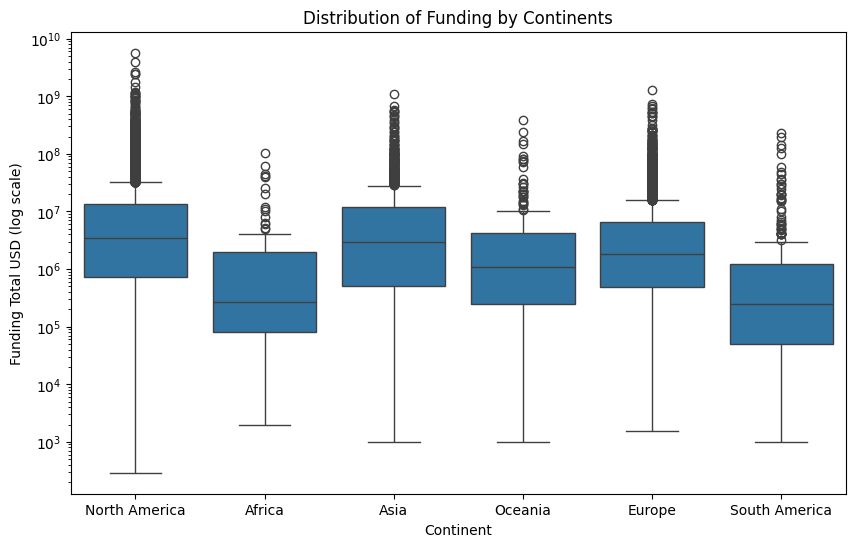

Number of companies per continent:
continent
North America    55671
Europe           19770
Asia              8876
Oceania           1671
South America     1101
Africa             613
Name: count, dtype: int64

Funding statistics by continent:
                 count          mean           std     min       25%  \
continent                                                              
Africa            88.0  5.076960e+06  1.469111e+07  2000.0   80000.0   
Asia            1709.0  1.611820e+07  5.457664e+07  1000.0  500000.0   
Europe          4891.0  9.967290e+06  3.907595e+07  1552.0  485776.5   
North America  19048.0  1.688441e+07  7.682476e+07   291.0  713412.5   
Oceania          241.0  9.142897e+06  3.427549e+07  1000.0  250000.0   
South America    269.0  5.611215e+06  2.341501e+07  1000.0   50000.0   

                     50%         75%           max  
continent                                           
Africa          267500.0   2000000.0  1.020000e+08  
Asia           300000

In [8]:
# show the distribution of funding by country code

def country_to_continent(country_code):
    if pd.isna(country_code):
        return 'NaN'
    
    country_code = str(country_code).upper()

    try:
        country_code_alpha2 = pc.country_alpha3_to_country_alpha2(country_code)
        continent_code = pc.country_alpha2_to_continent_code(country_code_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

df['continent'] = df['country_code'].apply(country_to_continent)

df_valid_continents = df[(df['continent'] != 'NaN') & (df['continent'] != 'Unknown')]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_valid_continents, x='continent', y='funding_total_usd')
plt.yscale('log')
plt.title('Distribution of Funding by Continents')
plt.xlabel('Continent')
plt.ylabel('Funding Total USD (log scale)')
plt.show()

# Show summary statistics
print("Number of companies per continent:")
print(df_valid_continents['continent'].value_counts())
print("\nFunding statistics by continent:")
print(df_valid_continents.groupby('continent')['funding_total_usd'].describe())

### Funding Distribution by Country Within Each Continent

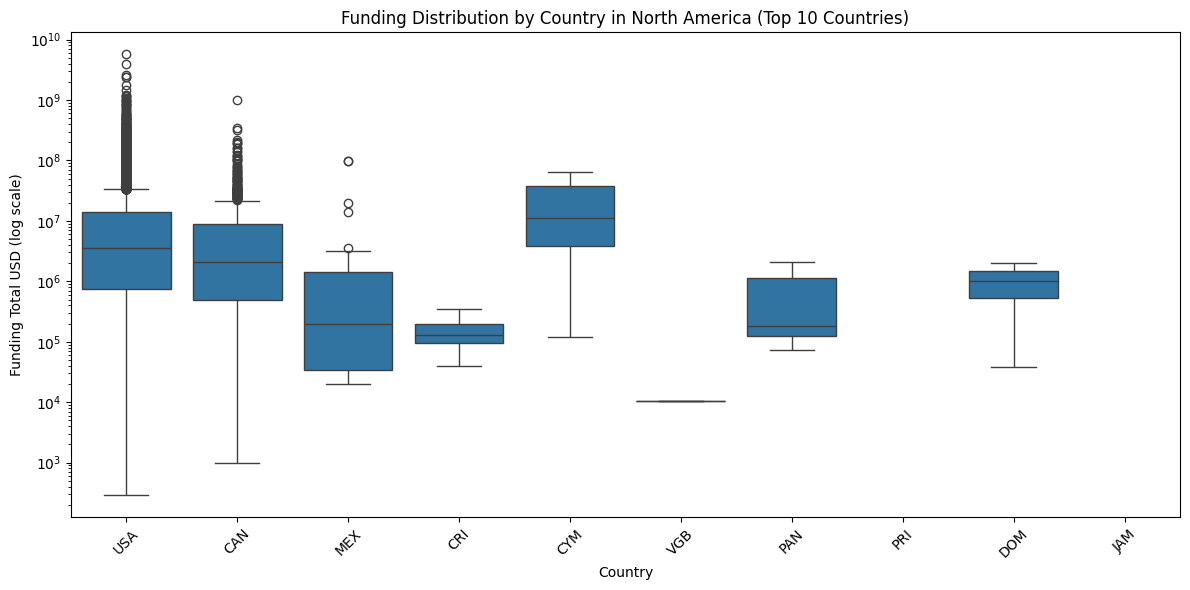


=== North America Statistics ===
Number of companies per country (top 10):
country_code
USA    51637
CAN     3728
MEX      144
CRI       27
PAN       19
PRI       19
CYM       15
DOM       13
VGB       11
JAM        8
Name: count, dtype: int64

Funding statistics by country in North America:
                count          mean           std       min         25%  \
country_code                                                              
CAN             853.0  1.156666e+07  4.362702e+07    1003.0   500000.00   
CRI               4.0  1.622500e+05  1.328568e+05   40000.0    94000.00   
CYM               7.0  2.281000e+07  2.769084e+07  120000.0  3775000.00   
DOM               2.0  1.019316e+06  1.386897e+06   38631.0   528973.25   
JAM               0.0           NaN           NaN       NaN         NaN   
MEX              28.0  8.577773e+06  2.519343e+07   20000.0    34615.50   
PAN               3.0  7.843333e+05  1.140656e+06   73000.0   126500.00   
PRI               0.0          

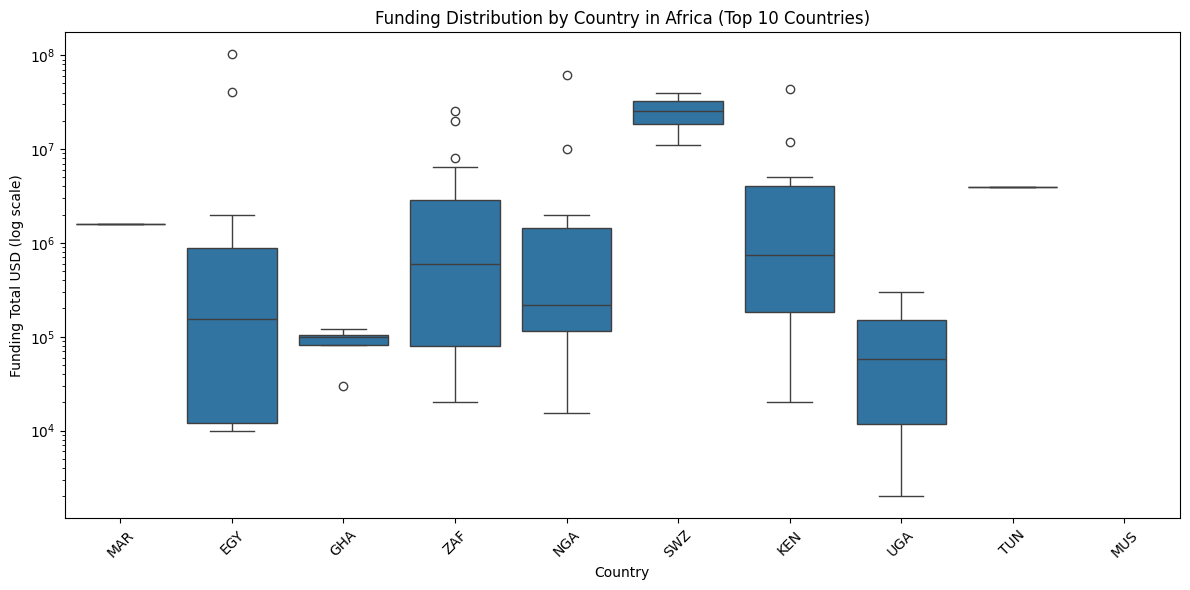


=== Africa Statistics ===
Number of companies per country (top 10):
country_code
ZAF    277
NGA     78
EGY     72
KEN     50
GHA     30
MAR     18
UGA     15
MUS     12
TUN      9
SWZ      8
Name: count, dtype: int64

Funding statistics by country in Africa:
              count          mean           std         min         25%  \
country_code                                                              
EGY            12.0  1.216708e+07  3.059855e+07     10000.0     12000.0   
GHA             4.0  8.740400e+04  3.937068e+04     30000.0     82500.0   
KEN            12.0  5.677494e+06  1.250937e+07     20000.0    181250.0   
MAR             2.0  1.600000e+06  0.000000e+00   1600000.0   1600000.0   
MUS             0.0           NaN           NaN         NaN         NaN   
NGA            11.0  6.812906e+06  1.820843e+07     15400.0    115000.0   
SWZ             2.0  2.557050e+07  2.040639e+07  11141000.0  18355750.0   
TUN             1.0  3.920000e+06           NaN   3920000.0   392

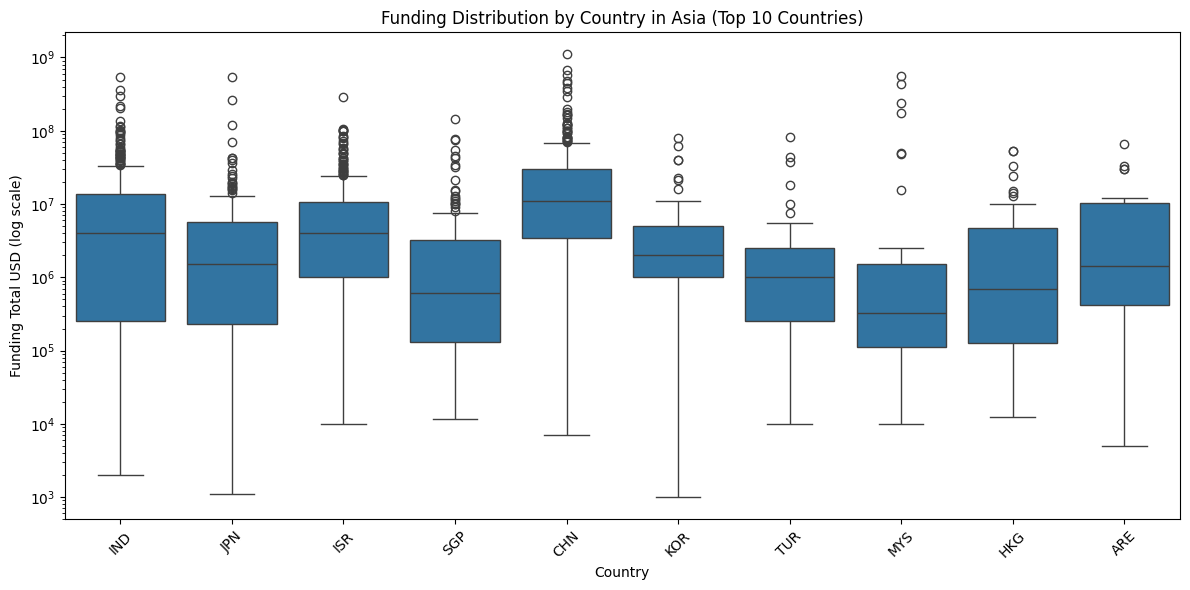


=== Asia Statistics ===
Number of companies per country (top 10):
country_code
IND    3924
ISR    1042
CHN     732
SGP     516
JPN     470
TUR     355
HKG     267
KOR     194
ARE     181
MYS     149
Name: count, dtype: int64

Funding statistics by country in Asia:
              count          mean           std      min        25%  \
country_code                                                          
ARE            20.0  9.625262e+06  1.702520e+07   5000.0   422500.0   
CHN           273.0  3.915655e+07  1.021819e+08   7000.0  3400000.0   
HKG            47.0  5.774498e+06  1.206027e+07  12500.0   125000.0   
IND           399.0  1.539201e+07  4.254135e+07   2000.0   255000.0   
ISR           467.0  9.593344e+06  2.038165e+07  10000.0  1000000.0   
JPN           124.0  1.308568e+07  5.512221e+07   1100.0   230000.0   
KOR            45.0  8.273608e+06  1.656170e+07   1000.0  1000000.0   
MYS            34.0  4.483413e+07  1.251969e+08  10000.0   112500.0   
SGP           151.0  5.4

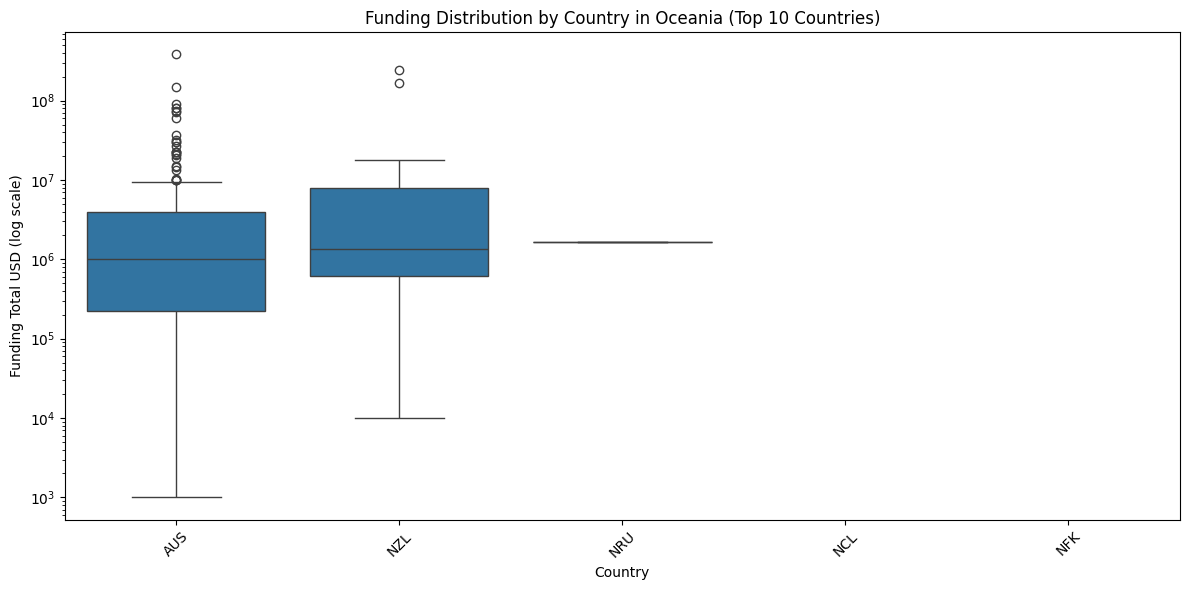


=== Oceania Statistics ===
Number of companies per country (top 10):
country_code
AUS    1455
NZL     213
NRU       1
NCL       1
NFK       1
Name: count, dtype: int64

Funding statistics by country in Oceania:
              count          mean           std        min        25%  \
country_code                                                            
AUS           209.0  8.001972e+06  3.104789e+07     1000.0   225000.0   
NCL             0.0           NaN           NaN        NaN        NaN   
NFK             0.0           NaN           NaN        NaN        NaN   
NRU             1.0  1.672580e+06           NaN  1672580.0  1672580.0   
NZL            31.0  1.707591e+07  5.137101e+07    10000.0   625000.0   

                    50%        75%          max  
country_code                                     
AUS           1022691.0  3986000.0  382106890.0  
NCL                 NaN        NaN          NaN  
NFK                 NaN        NaN          NaN  
NRU           1672580.0  1

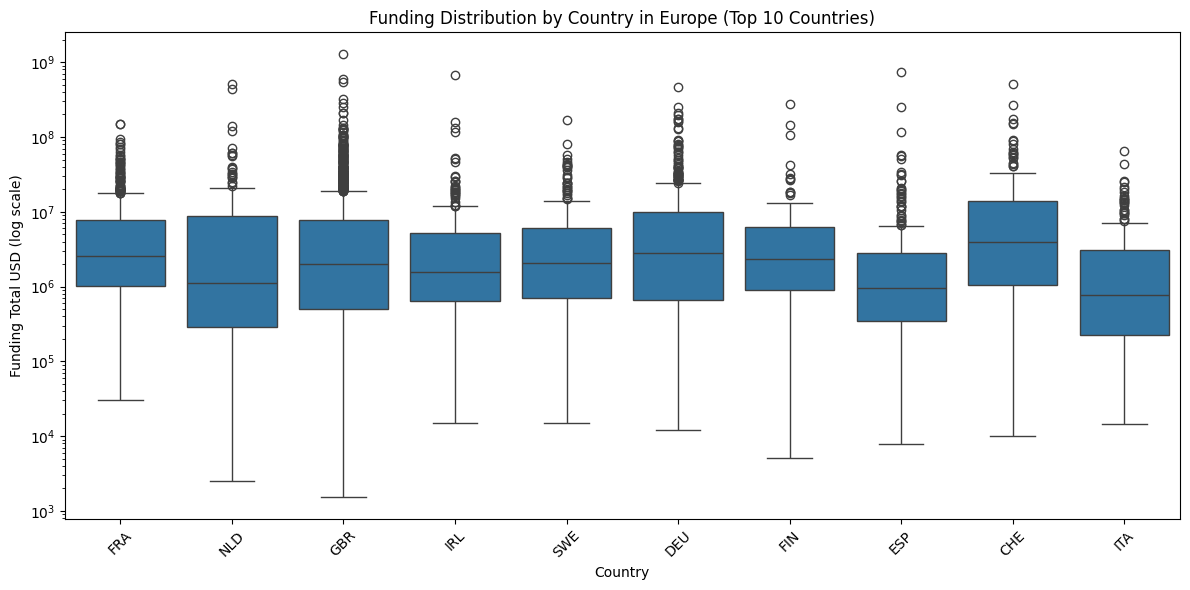


=== Europe Statistics ===
Number of companies per country (top 10):
country_code
GBR    7372
DEU    1921
FRA    1652
ESP    1100
IRL    1079
NLD     866
SWE     705
ITA     626
FIN     578
CHE     515
Name: count, dtype: int64

Funding statistics by country in Europe:
               count          mean           std      min         25%  \
country_code                                                            
CHE            140.0  2.020895e+07  5.505319e+07  10000.0  1050191.75   
DEU            451.0  1.278442e+07  3.521435e+07  12000.0   669050.00   
ESP            329.0  6.496460e+06  4.395284e+07   7778.0   340967.00   
FIN            110.0  9.562867e+06  3.096451e+07   5148.0   896322.50   
FRA            626.0  7.340476e+06  1.427254e+07  30488.0  1020140.00   
GBR           1676.0  1.056421e+07  4.260023e+07   1552.0   500000.00   
IRL            208.0  1.000321e+07  5.005463e+07  15000.0   639702.00   
ITA            182.0  3.433126e+06  7.331593e+06  14450.0   226647.00   


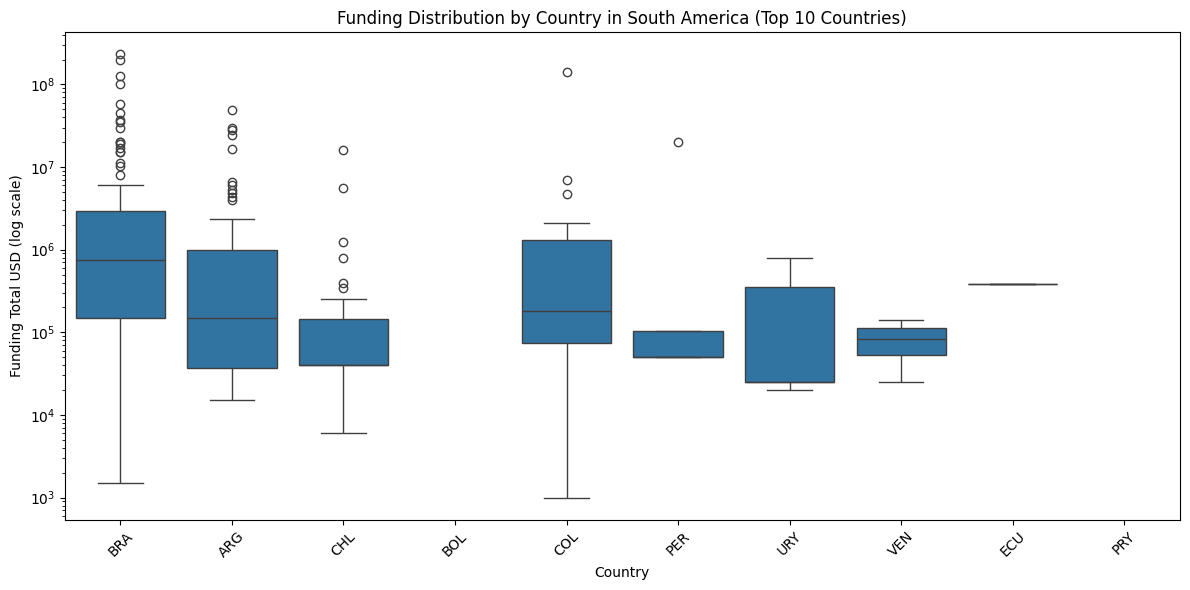


=== South America Statistics ===
Number of companies per country (top 10):
country_code
BRA    536
ARG    320
CHL     96
COL     62
URY     39
PER     22
VEN     16
BOL      3
ECU      3
PRY      3
Name: count, dtype: int64

Funding statistics by country in South America:
              count          mean           std       min       25%       50%  \
country_code                                                                    
ARG            77.0  2.604838e+06  7.753792e+06   15000.0   37000.0  150000.0   
BOL             0.0           NaN           NaN       NaN       NaN       NaN   
BRA           122.0  9.045934e+06  3.148670e+07    1500.0  150000.0  750000.0   
CHL            40.0  6.680500e+05  2.641965e+06    6000.0   40000.0   40000.0   
COL            17.0  9.205853e+06  3.376084e+07    1000.0   75000.0  180000.0   
ECU             1.0  3.788130e+05           NaN  378813.0  378813.0  378813.0   
PER             5.0  4.051000e+06  8.915794e+06   50000.0   50000.0   50000.0 

In [9]:
for cont in df_valid_continents['continent'].unique():
    df_cont = df_valid_continents[df_valid_continents['continent'] == cont]
    
    top_countries = df_cont['country_code'].value_counts().head(10).index
    df_cont_top = df_cont[df_cont['country_code'].isin(top_countries)]
    
    plt.figure(figsize=(12,6))
    sns.boxplot(x='country_code', y='funding_total_usd', data=df_cont_top)
    plt.yscale('log')
    plt.title(f'Funding Distribution by Country in {cont} (Top 10 Countries)')
    plt.xlabel('Country')
    plt.ylabel('Funding Total USD (log scale)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Show summary statistics for this continent
    print(f"\n=== {cont} Statistics ===")
    print(f"Number of companies per country (top 10):")
    print(df_cont_top['country_code'].value_counts())
    print(f"\nFunding statistics by country in {cont}:")
    print(df_cont_top.groupby('country_code')['funding_total_usd'].describe())

### Funding Distribution Within Each US Region

Regions Used - Northeast, Midwest, South, West

In [22]:
state_to_region = {
    # Northeast
    'CT':'Northeast','ME':'Northeast','MA':'Northeast','NH':'Northeast',
    'RI':'Northeast','VT':'Northeast','NJ':'Northeast','NY':'Northeast','PA':'Northeast',
    # Midwest
    'IN':'Midwest','IL':'Midwest','MI':'Midwest','OH':'Midwest','WI':'Midwest',
    'IA':'Midwest','KS':'Midwest','MN':'Midwest','MO':'Midwest','NE':'Midwest','ND':'Midwest','SD':'Midwest',
    # South
    'DE':'South','FL':'South','GA':'South','MD':'South','NC':'South','SC':'South','VA':'South','DC':'South','WV':'South',
    'AL':'South','KY':'South','MS':'South','TN':'South','AR':'South','LA':'South','OK':'South','TX':'South',
    # West
    'AZ':'West','CO':'West','ID':'West','MT':'West','NV':'West','NM':'West','UT':'West','WY':'West',
    'AK':'West','CA':'West','HI':'West','OR':'West','WA':'West'
}

df['us_region'] = df['state_code'].map(state_to_region)
df['us_region'].value_counts()

us_region
West         22255
Northeast    12276
South        10998
Midwest       5374
Name: count, dtype: int64

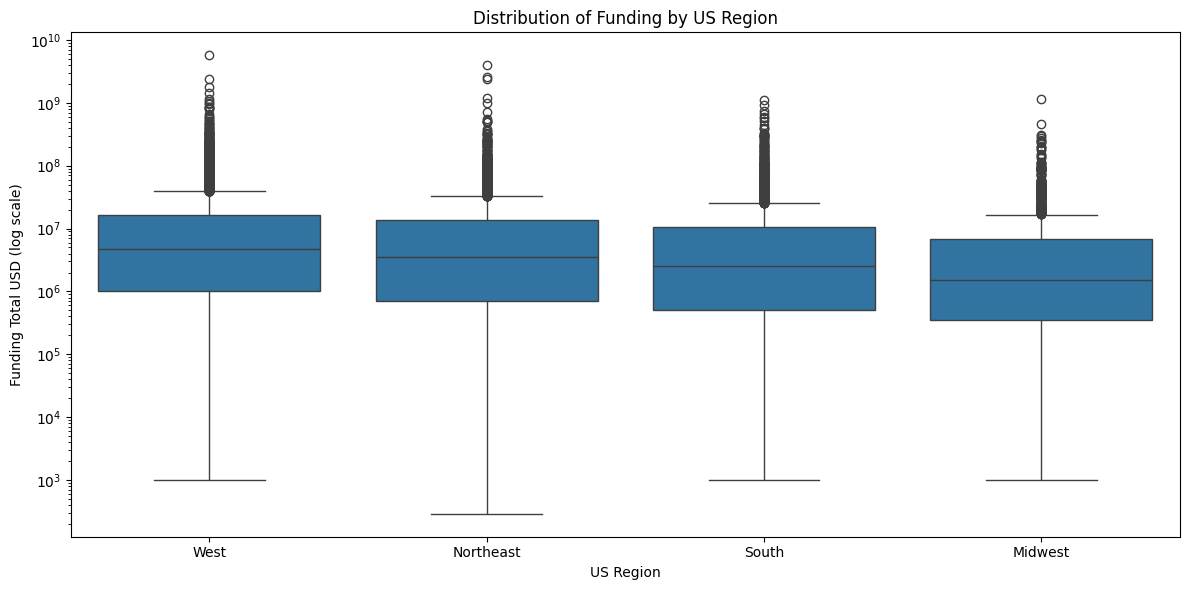

Number of companies per US region:
us_region
West         22171
Northeast    12240
South        10923
Midwest       5328
Name: count, dtype: int64

Funding statistics by region:
            count          mean           std     min        25%        50%  \
us_region                                                                     
Midwest    1548.0  1.074224e+07  4.127985e+07  1000.0   350000.0  1519473.0   
Northeast  4558.0  1.698731e+07  8.938464e+07   291.0   700000.0  3500000.0   
South      3223.0  1.436986e+07  4.754610e+07  1000.0   500000.0  2500000.0   
West       8576.0  1.955549e+07  8.619122e+07  1000.0  1000000.0  4700000.0   

                   75%           max  
us_region                             
Midwest     6924999.25  1.147288e+09  
Northeast  13451591.25  3.985050e+09  
South      10462940.50  1.100000e+09  
West       16548627.50  5.700000e+09  


In [11]:
# Visualize funding distribution by US region
df_us_regions = df[(df['country_code'] == 'USA') & (df['us_region'].notna())]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_us_regions, x='us_region', y='funding_total_usd')
plt.yscale('log')
plt.title('Distribution of Funding by US Region')
plt.xlabel('US Region')
plt.ylabel('Funding Total USD (log scale)')
plt.tight_layout()
plt.show()

# Show summary statistics
print("Number of companies per US region:")
print(df_us_regions['us_region'].value_counts())
print("\nFunding statistics by region:")
print(df_us_regions.groupby('us_region')['funding_total_usd'].describe())

### Funding Distribution by State Within Each US Region

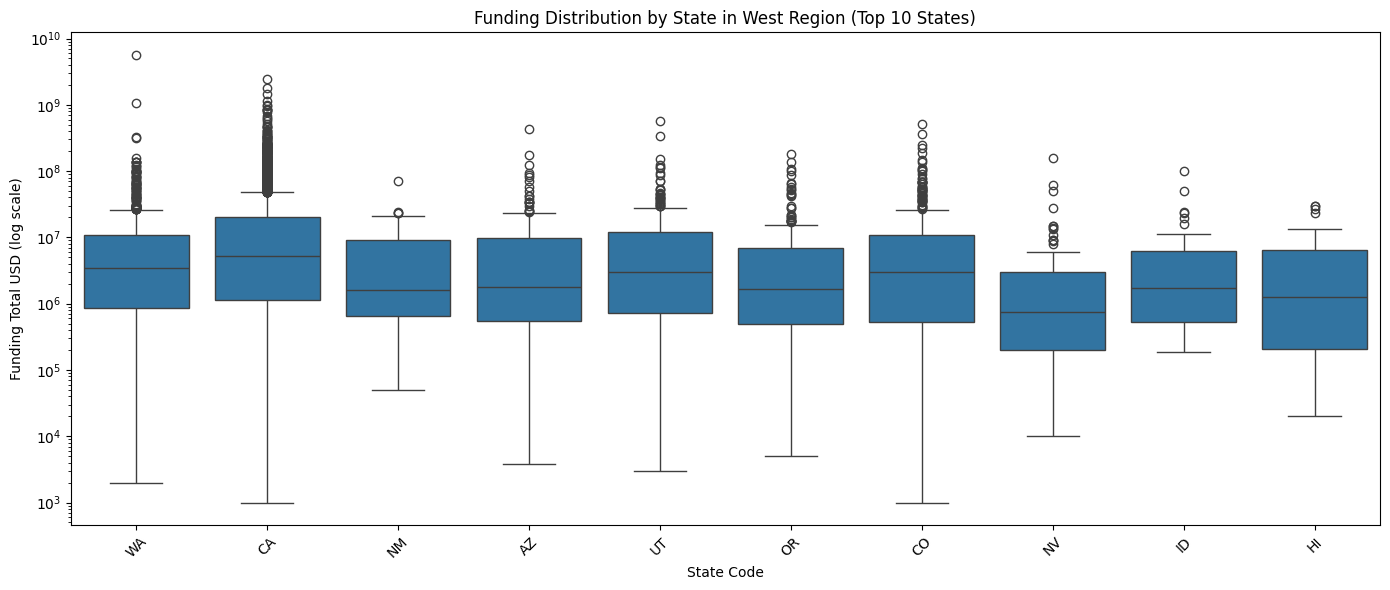


=== West Region Statistics ===
Number of companies per state (top 10):
state_code
CA    16447
WA     1887
CO     1172
AZ      755
OR      592
UT      559
NV      398
ID       92
NM       86
HI       82
Name: count, dtype: int64

Funding statistics by state in West:
             count          mean           std       min         25%  \
state_code                                                             
AZ           178.0  1.204788e+07  3.815773e+07    3750.0   544531.50   
CA          6584.0  2.085872e+07  6.535811e+07    1000.0  1138799.50   
CO           461.0  1.345007e+07  3.813119e+07    1000.0   520000.00   
HI            33.0  5.690074e+06  9.016885e+06   20000.0   210000.00   
ID            31.0  9.412841e+06  2.021352e+07  188375.0   537122.50   
NM            42.0  7.218348e+06  1.232867e+07   49000.0   655000.25   
NV            98.0  5.154639e+06  1.764943e+07   10000.0   202500.00   
OR           204.0  9.196108e+06  2.220495e+07    5000.0   500000.00   
UT           

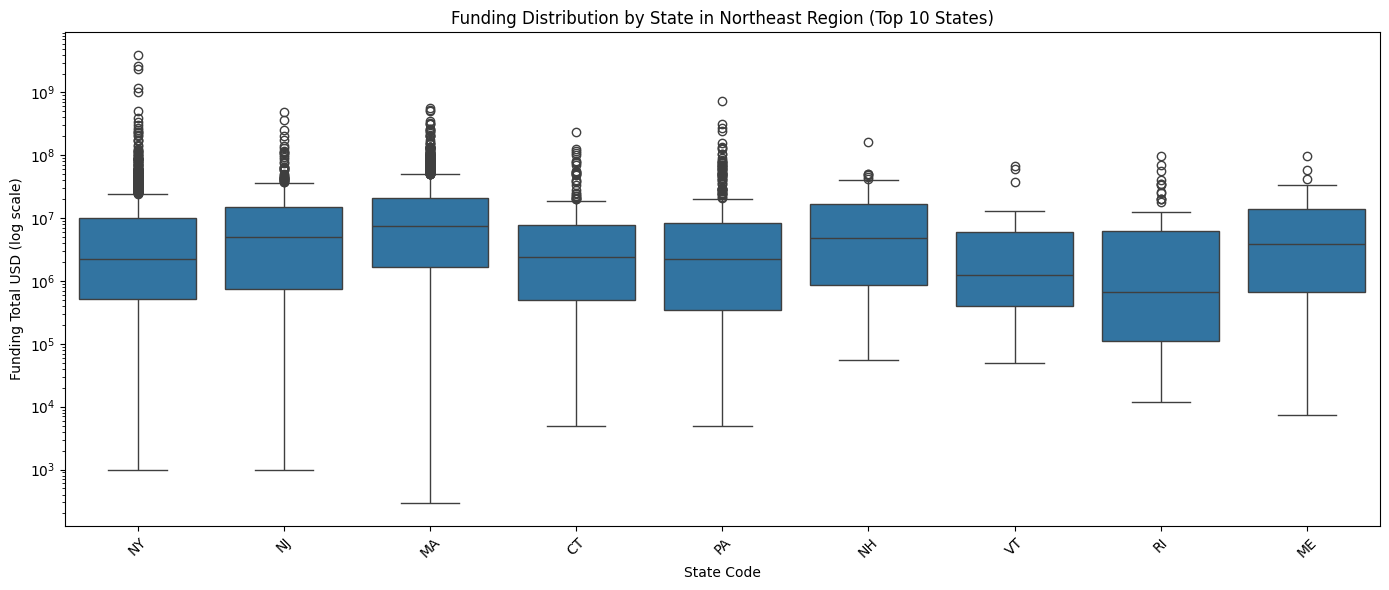


=== Northeast Region Statistics ===
Number of companies per state (top 10):
state_code
NY    5716
MA    2933
PA    1320
NJ    1179
CT     536
NH     216
RI     153
ME      97
VT      90
Name: count, dtype: int64

Funding statistics by state in Northeast:
             count          mean           std      min        25%        50%  \
state_code                                                                      
CT           216.0  1.083215e+07  2.537899e+07   5000.0   503750.0  2425760.0   
MA          1462.0  2.015209e+07  4.172338e+07    291.0  1700000.0  7451716.0   
ME            51.0  1.130498e+07  1.760374e+07   7500.0   672124.5  3900000.0   
NH            72.0  1.386914e+07  2.273845e+07  55000.0   852499.5  4850000.0   
NJ           334.0  1.754162e+07  4.315374e+07   1000.0   750000.0  5000000.0   
NY          1830.0  1.697623e+07  1.323849e+08   1000.0   515250.0  2203125.0   
PA           485.0  1.294511e+07  4.378639e+07   5000.0   350000.0  2200000.0   
RI            8

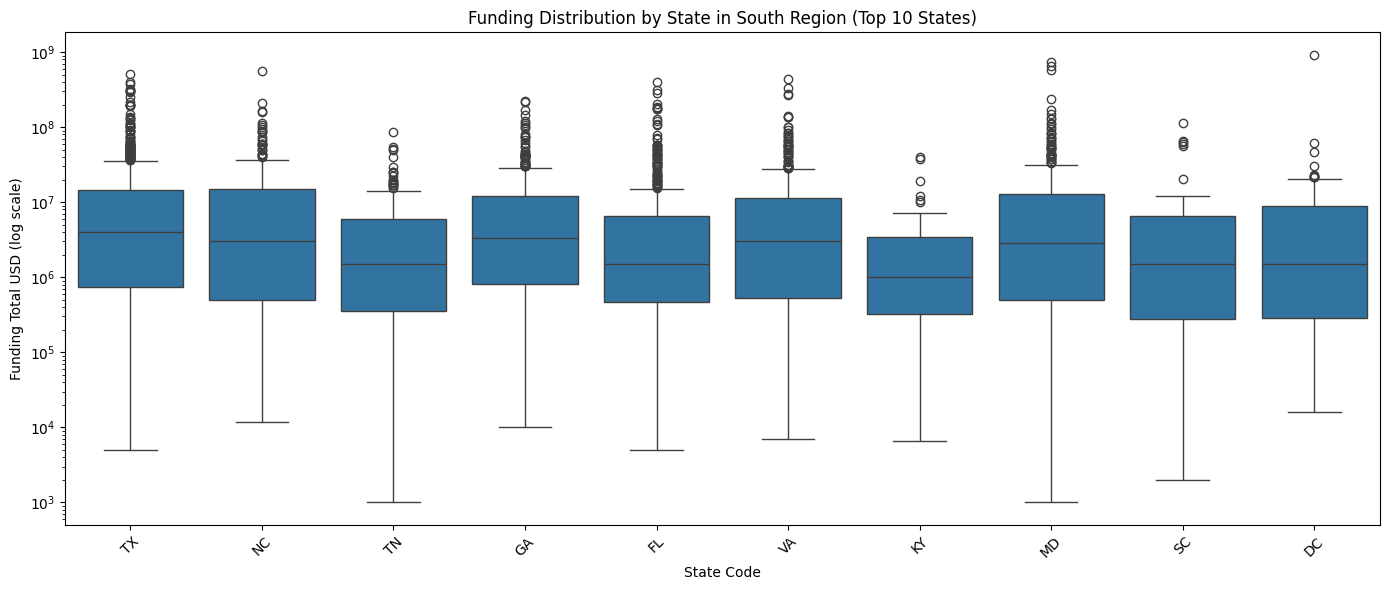


=== South Region Statistics ===
Number of companies per state (top 10):
state_code
TX    2802
FL    2149
VA    1156
GA    1119
NC     843
MD     770
TN     545
DC     363
KY     214
SC     193
Name: count, dtype: int64

Funding statistics by state in South:
            count          mean           std      min       25%        50%  \
state_code                                                                    
DC           91.0  1.625947e+07  9.680784e+07  16000.0  287964.5  1500000.0   
FL          472.0  1.126577e+07  3.516029e+07   5000.0  467468.5  1500000.0   
GA          312.0  1.364156e+07  2.801826e+07  10000.0  809840.0  3347837.5   
KY           65.0  3.576459e+06  7.231097e+06   6500.0  325000.0  1000000.0   
MD          316.0  2.009005e+07  6.925267e+07   1000.0  500000.0  2821375.0   
NC          284.0  1.527562e+07  4.190349e+07  11600.0  500000.0  3000000.0   
SC           50.0  9.891119e+06  2.213722e+07   2000.0  274999.5  1506507.0   
TN          176.0  5.602132e+0

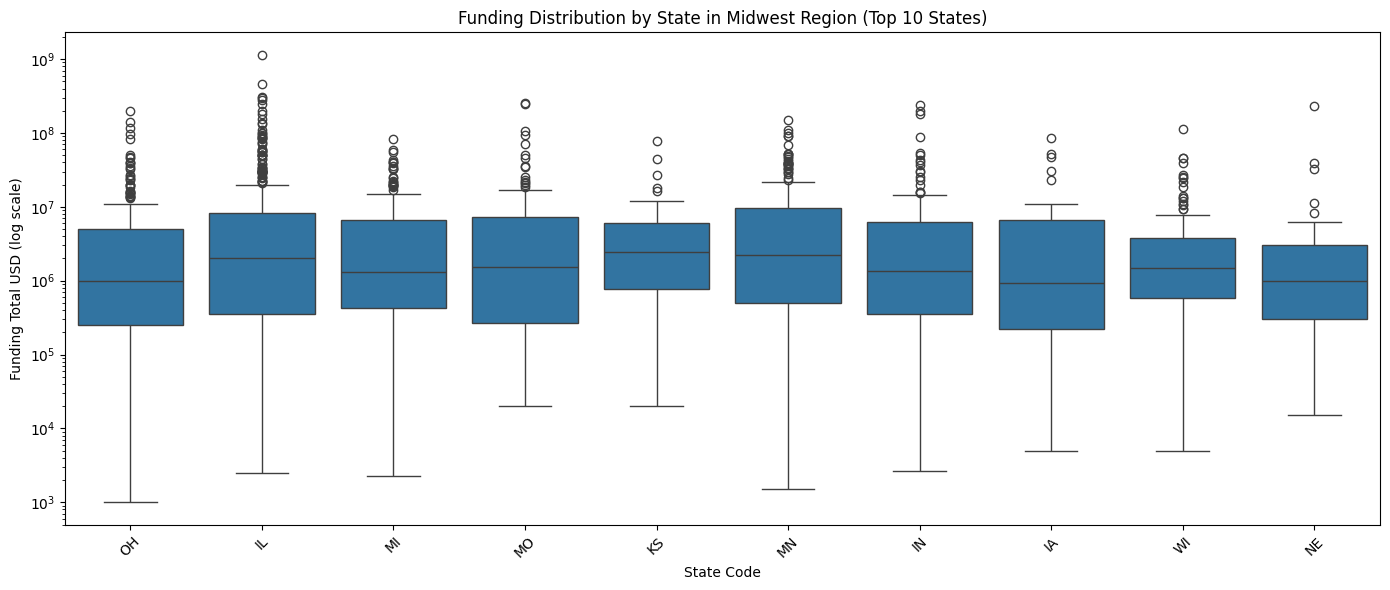


=== Midwest Region Statistics ===
Number of companies per state (top 10):
state_code
IL    1736
OH     751
MN     669
MI     630
MO     397
WI     343
IN     336
KS     174
NE     125
IA     114
Name: count, dtype: int64

Funding statistics by state in Midwest:
            count          mean           std      min       25%        50%  \
state_code                                                                    
IA           32.0  9.064482e+06  1.914308e+07   5000.0  218750.0   921212.5   
IL          428.0  1.676781e+07  6.875671e+07   2500.0  350000.0  2000000.0   
IN          108.0  1.209023e+07  3.583706e+07   2667.0  348750.0  1353680.0   
KS           51.0  6.355075e+06  1.267824e+07  20000.0  780000.0  2446187.0   
MI          167.0  6.519480e+06  1.235798e+07   2250.0  425000.0  1310000.0   
MN          225.0  9.921432e+06  1.949684e+07   1500.0  500000.0  2236501.0   
MO          115.0  1.180504e+07  3.616346e+07  20000.0  265000.0  1553266.0   
NE           41.0  9.04589

In [12]:
# Show funding distribution by state within each US region
for region in df_us_regions['us_region'].unique():
    df_region = df_us_regions[df_us_regions['us_region'] == region]
    
    # Get top 10 states by number of companies for readability
    top_states = df_region['state_code'].value_counts().head(10).index
    df_region_top = df_region[df_region['state_code'].isin(top_states)]
    
    if len(df_region_top) > 0:  # Only plot if there's data
        plt.figure(figsize=(14,6))
        sns.boxplot(x='state_code', y='funding_total_usd', data=df_region_top)
        plt.yscale('log')
        plt.title(f'Funding Distribution by State in {region} Region (Top 10 States)')
        plt.xlabel('State Code')
        plt.ylabel('Funding Total USD (log scale)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Show summary statistics for this region
        print(f"\n=== {region} Region Statistics ===")
        print(f"Number of companies per state (top 10):")
        print(df_region_top['state_code'].value_counts())
        print(f"\nFunding statistics by state in {region}:")
        print(df_region_top.groupby('state_code')['funding_total_usd'].describe())
        print("-" * 80)

# Distribution of Funding by Industry

Available industry categories:
category_code
software            17922
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
Name: count, dtype: int64

Total unique categories: 42
Companies with missing category: 73367


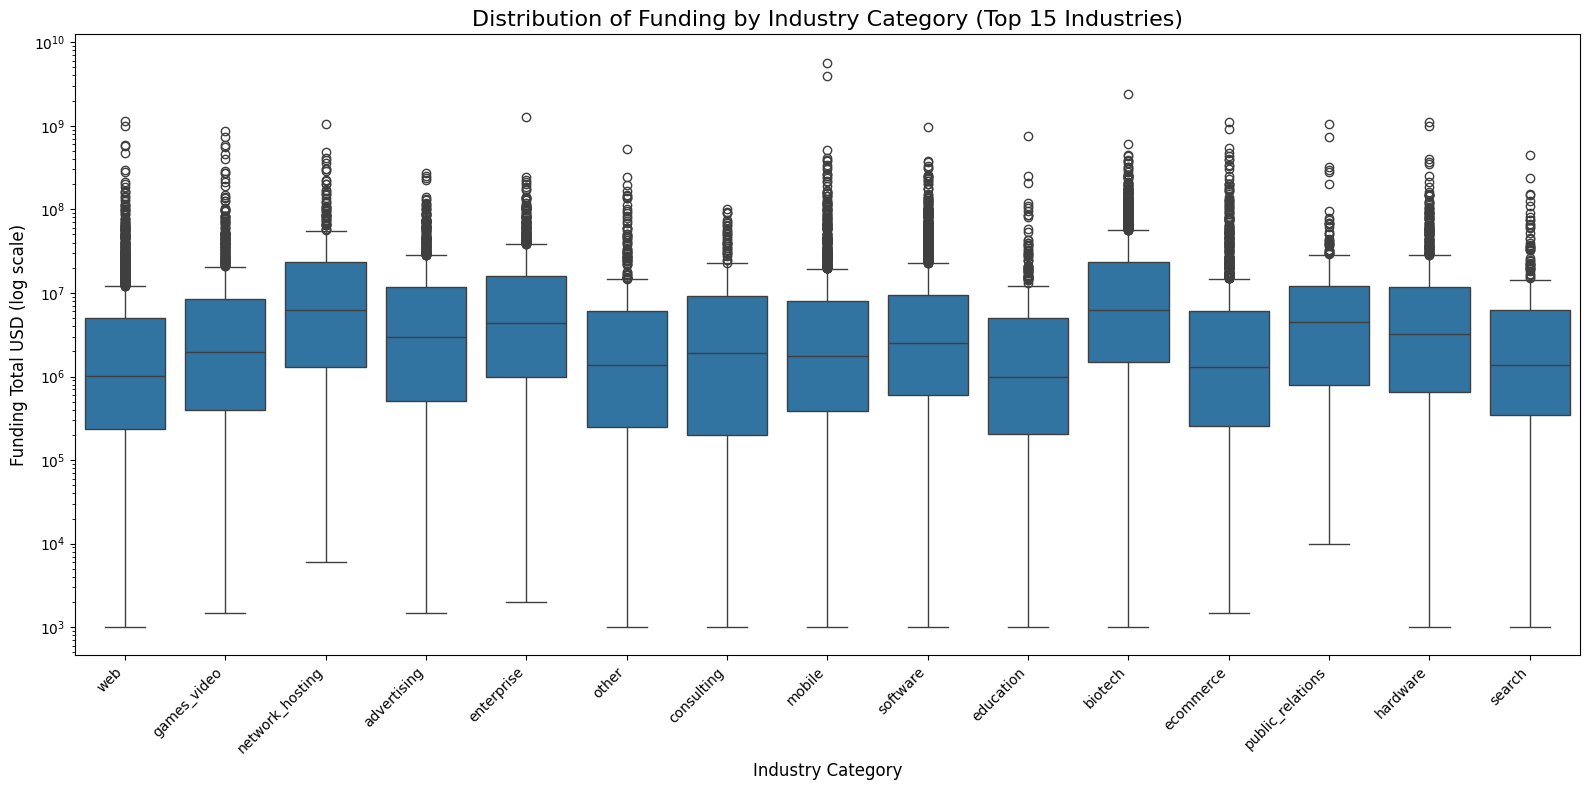


=== Industry Funding Statistics (Top 15) ===
Number of companies per industry:
category_code
software            17922
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
Name: count, dtype: int64

Funding statistics by industry:
                   count          mean           std      min         25%  \
category_code                                                               
advertising       1082.0  1.154176e+07  2.381123e+07   1500.0   512883.75   
biotech           3103.0  2.154969e+07  5.830483e+07   1000.0  1500000.00   
consulting         288.0  9.086285e+06  1.719486e+07   1000.0   197500.00   
ecommerce         1334.0  1.321451e+07  5.531815e+07   1500.0   257320.0

In [13]:
print("Available industry categories:")
print(df['category_code'].value_counts().head(20))
print(f"\nTotal unique categories: {df['category_code'].nunique()}")
print(f"Companies with missing category: {df['category_code'].isnull().sum()}")

df_with_categories = df[df['category_code'].notna()]

top_industries = df_with_categories['category_code'].value_counts().head(15).index
df_top_industries = df_with_categories[df_with_categories['category_code'].isin(top_industries)]

plt.figure(figsize=(16, 8))
sns.boxplot(data=df_top_industries, x='category_code', y='funding_total_usd')
plt.yscale('log')
plt.title('Distribution of Funding by Industry Category (Top 15 Industries)', fontsize=16)
plt.xlabel('Industry Category', fontsize=12)
plt.ylabel('Funding Total USD (log scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n=== Industry Funding Statistics (Top 15) ===")
print("Number of companies per industry:")
print(df_top_industries['category_code'].value_counts())
print("\nFunding statistics by industry:")
print(df_top_industries.groupby('category_code')['funding_total_usd'].describe())

### Risk Based Features

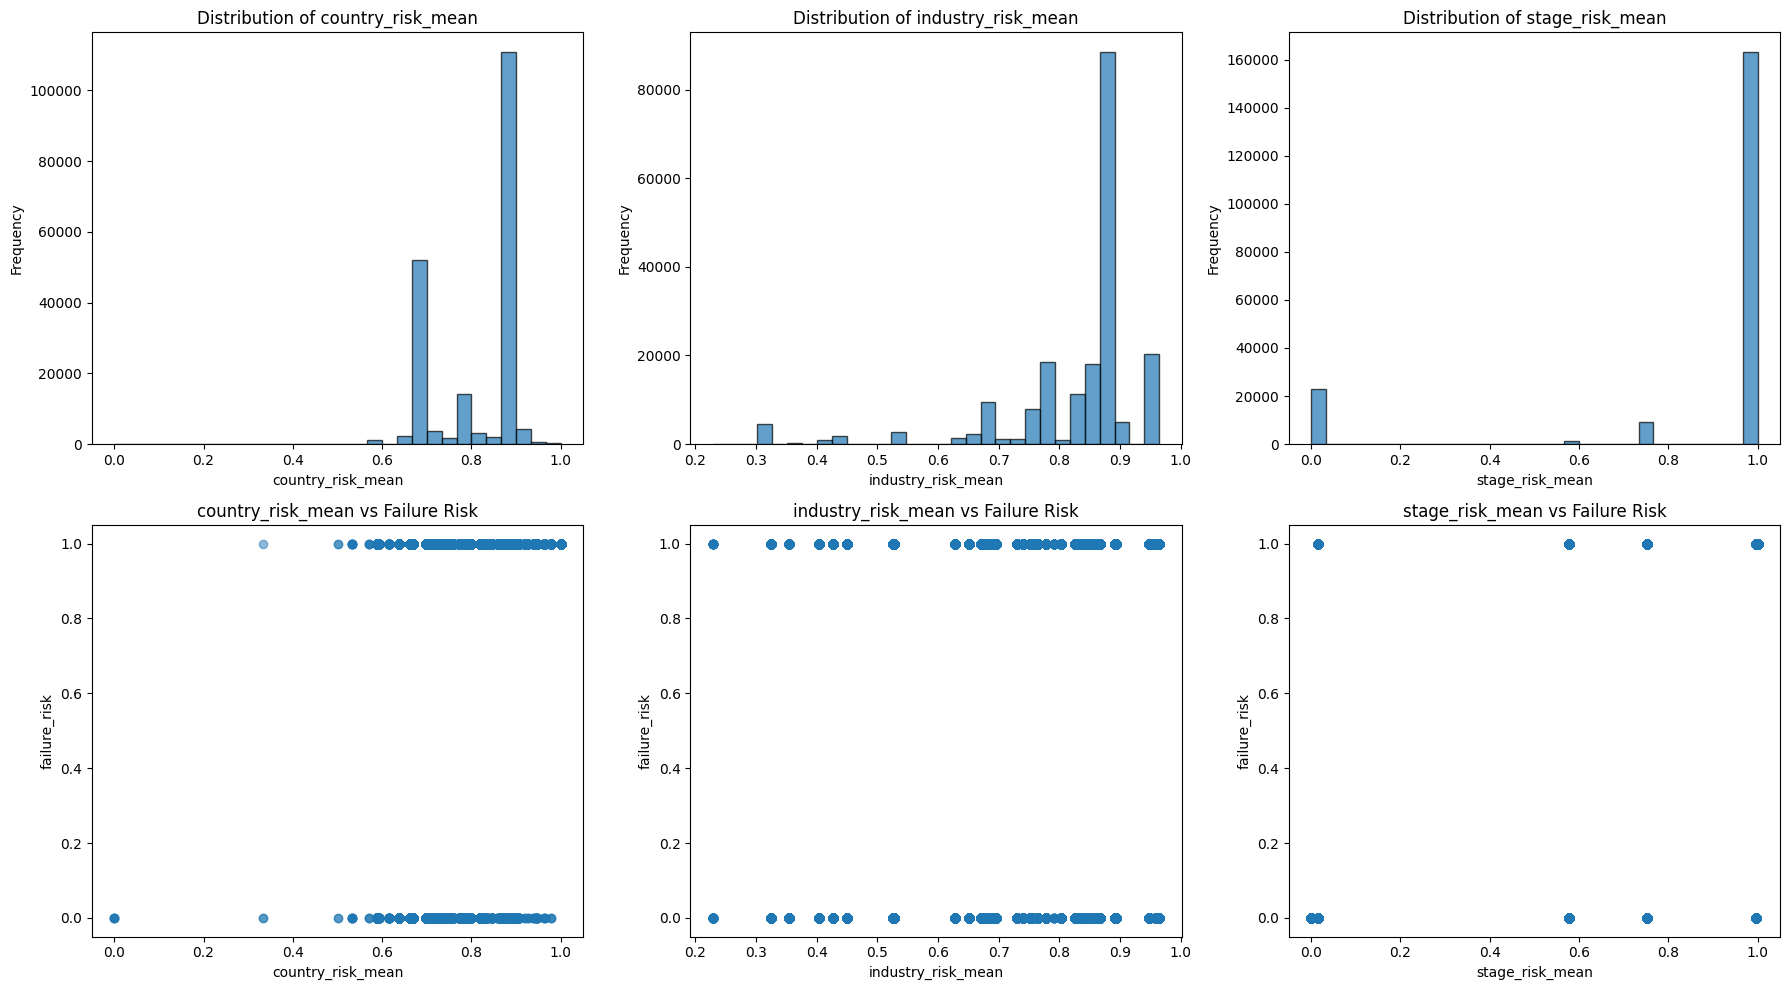

Risk Features Summary:

country_risk_mean:
  Mean: 0.8016
  Std:  0.0911
  Min:  0.0000
  Max:  1.0000
  Corr with failure_risk: 0.4107

industry_risk_mean:
  Mean: 0.8232
  Std:  0.1210
  Min:  0.2286
  Max:  0.9647
  Corr with failure_risk: 0.4054

stage_risk_mean:
  Mean: 0.8677
  Std:  0.3184
  Min:  0.0000
  Max:  1.0000
  Corr with failure_risk: 0.9399


In [14]:
# Analyze risk-based features
risk_features = ['country_risk_mean', 'industry_risk_mean', 'stage_risk_mean']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(risk_features):
    if feature in df.columns:
        # Distribution plot
        axes[i].hist(df[feature].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        
        # Box plot vs failure_risk
        axes[i+3].scatter(df[feature], df['failure_risk'], alpha=0.5)
        axes[i+3].set_xlabel(feature)
        axes[i+3].set_ylabel('failure_risk')
        axes[i+3].set_title(f'{feature} vs Failure Risk')

plt.tight_layout()
plt.show()

# Summary statistics for risk features
print("Risk Features Summary:")
print("=" * 50)
for feature in risk_features:
    if feature in df.columns:
        print(f"\n{feature}:")
        print(f"  Mean: {df[feature].mean():.4f}")
        print(f"  Std:  {df[feature].std():.4f}")
        print(f"  Min:  {df[feature].min():.4f}")
        print(f"  Max:  {df[feature].max():.4f}")
        print(f"  Corr with failure_risk: {df[feature].corr(df['failure_risk']):.4f}")

## Composite Scores Analysis

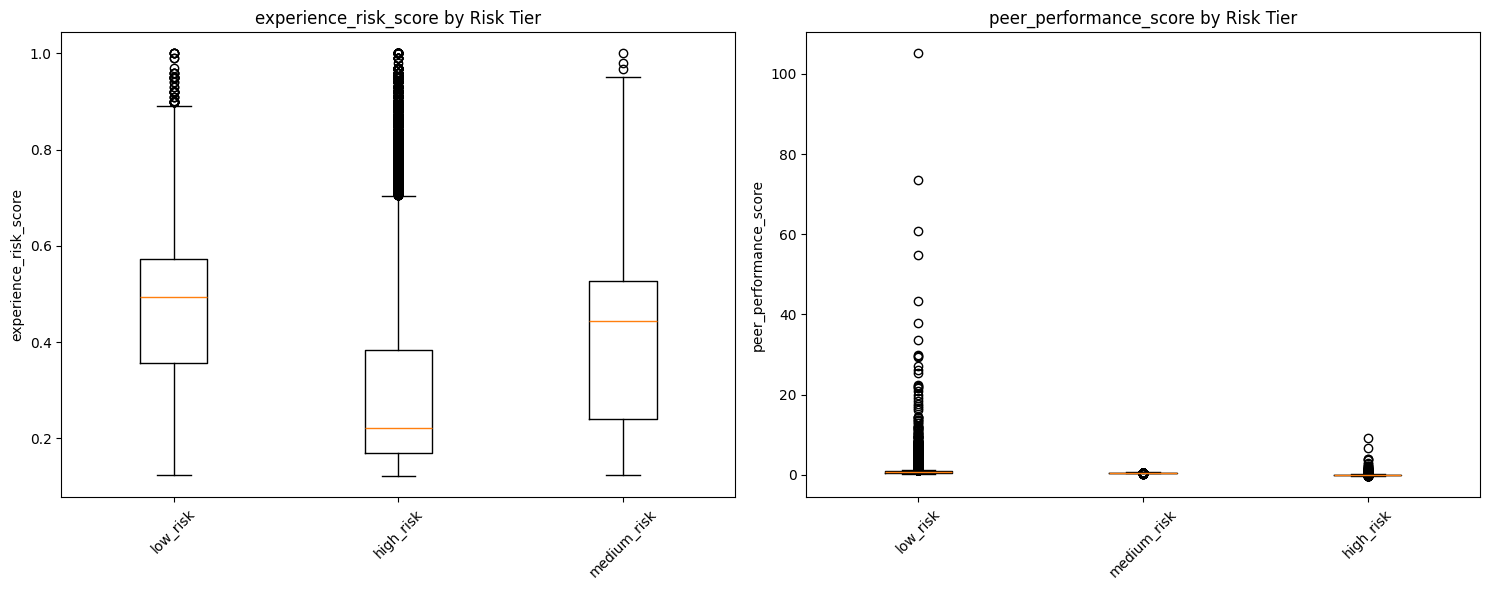

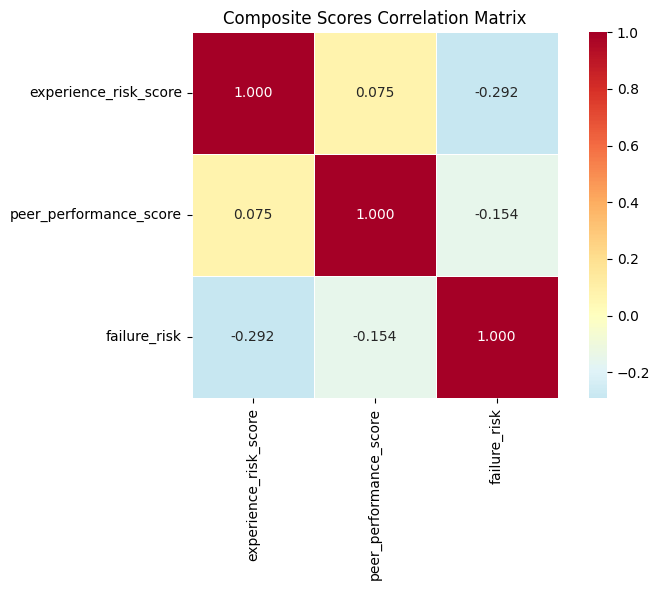

Composite Scores vs Failure Risk:
experience_risk_score    : -0.292
peer_performance_score   : -0.154


In [15]:
# Analyze composite score features
composite_features = ['experience_risk_score', 'peer_performance_score']

available_features = [f for f in composite_features if f in df.columns]

if available_features:
    n_features = len(available_features)
    if n_features == 1:
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        axes = [ax]
    else:
        fig, axes = plt.subplots(1, n_features, figsize=(15, 6))
        if n_features == 1:
            axes = [axes]

    for i, feature in enumerate(available_features):
        # Create risk tier bins
        df_plot = df[df[feature].notna() & df['risk_tier_label'].notna()]
        
        if len(df_plot) > 0:
            # Box plot by risk tier
            risk_tiers = df_plot['risk_tier_label'].unique()
            risk_data = [df_plot[df_plot['risk_tier_label'] == tier][feature].values for tier in risk_tiers]
            
            axes[i].boxplot(risk_data, tick_labels=risk_tiers)
            axes[i].set_title(f'{feature} by Risk Tier')
            axes[i].set_ylabel(feature)
            axes[i].tick_params(axis='x', rotation=45)
        else:
            axes[i].text(0.5, 0.5, 'No data available', 
                        horizontalalignment='center', verticalalignment='center',
                        transform=axes[i].transAxes)
            axes[i].set_title(f'{feature} by Risk Tier (No Data)')

    plt.tight_layout()
    plt.show()
else:
    print("No composite score features found in the dataset.")

# Correlation matrix for composite scores
composite_corr = df[composite_features + ['failure_risk']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(composite_corr, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=.5, fmt='.3f')
plt.title('Composite Scores Correlation Matrix')
plt.tight_layout()
plt.show()

print("Composite Scores vs Failure Risk:")
print("=" * 40)
for feature in composite_features:
    if feature in df.columns:
        corr = df[feature].corr(df['failure_risk'])
        print(f"{feature:25s}: {corr:6.3f}")

# Correlation Analysis: Features vs Startup Success/Failure

## Numerical Correlation Analysis

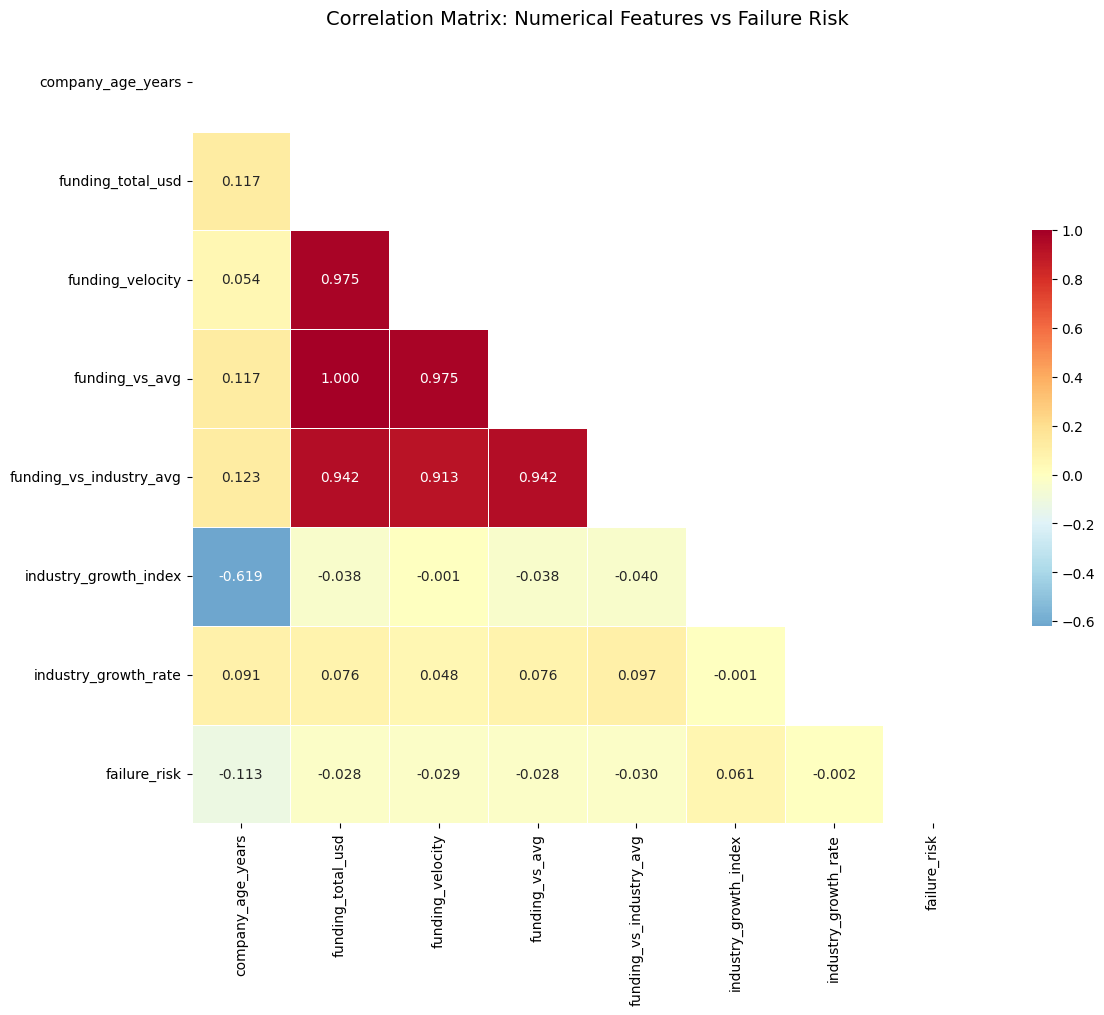

Correlations with Failure Risk (sorted by absolute value):
company_age_years        : -0.113
industry_growth_index    :  0.061
funding_vs_industry_avg  : -0.030
funding_velocity         : -0.029
funding_total_usd        : -0.028
funding_vs_avg           : -0.028
industry_growth_rate     : -0.002


In [16]:
# Select numerical features for correlation analysis
numerical_features = ['company_age_years', 'funding_total_usd', 'funding_velocity', 
                      'funding_vs_avg', 'funding_vs_industry_avg', 'industry_growth_index', 
                      'industry_growth_rate', 'failure_risk']

correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.3f')
plt.title('Correlation Matrix: Numerical Features vs Failure Risk', fontsize=14)
plt.tight_layout()
plt.show()

# Show correlations with failure_risk specifically
print("Correlations with Failure Risk (sorted by absolute value):")
failure_risk_corr = correlation_matrix['failure_risk'].drop('failure_risk').sort_values(key=abs, ascending=False)
for feature, corr in failure_risk_corr.items():
    print(f"{feature:25s}: {corr:6.3f}")

### Categorical features by risk tier

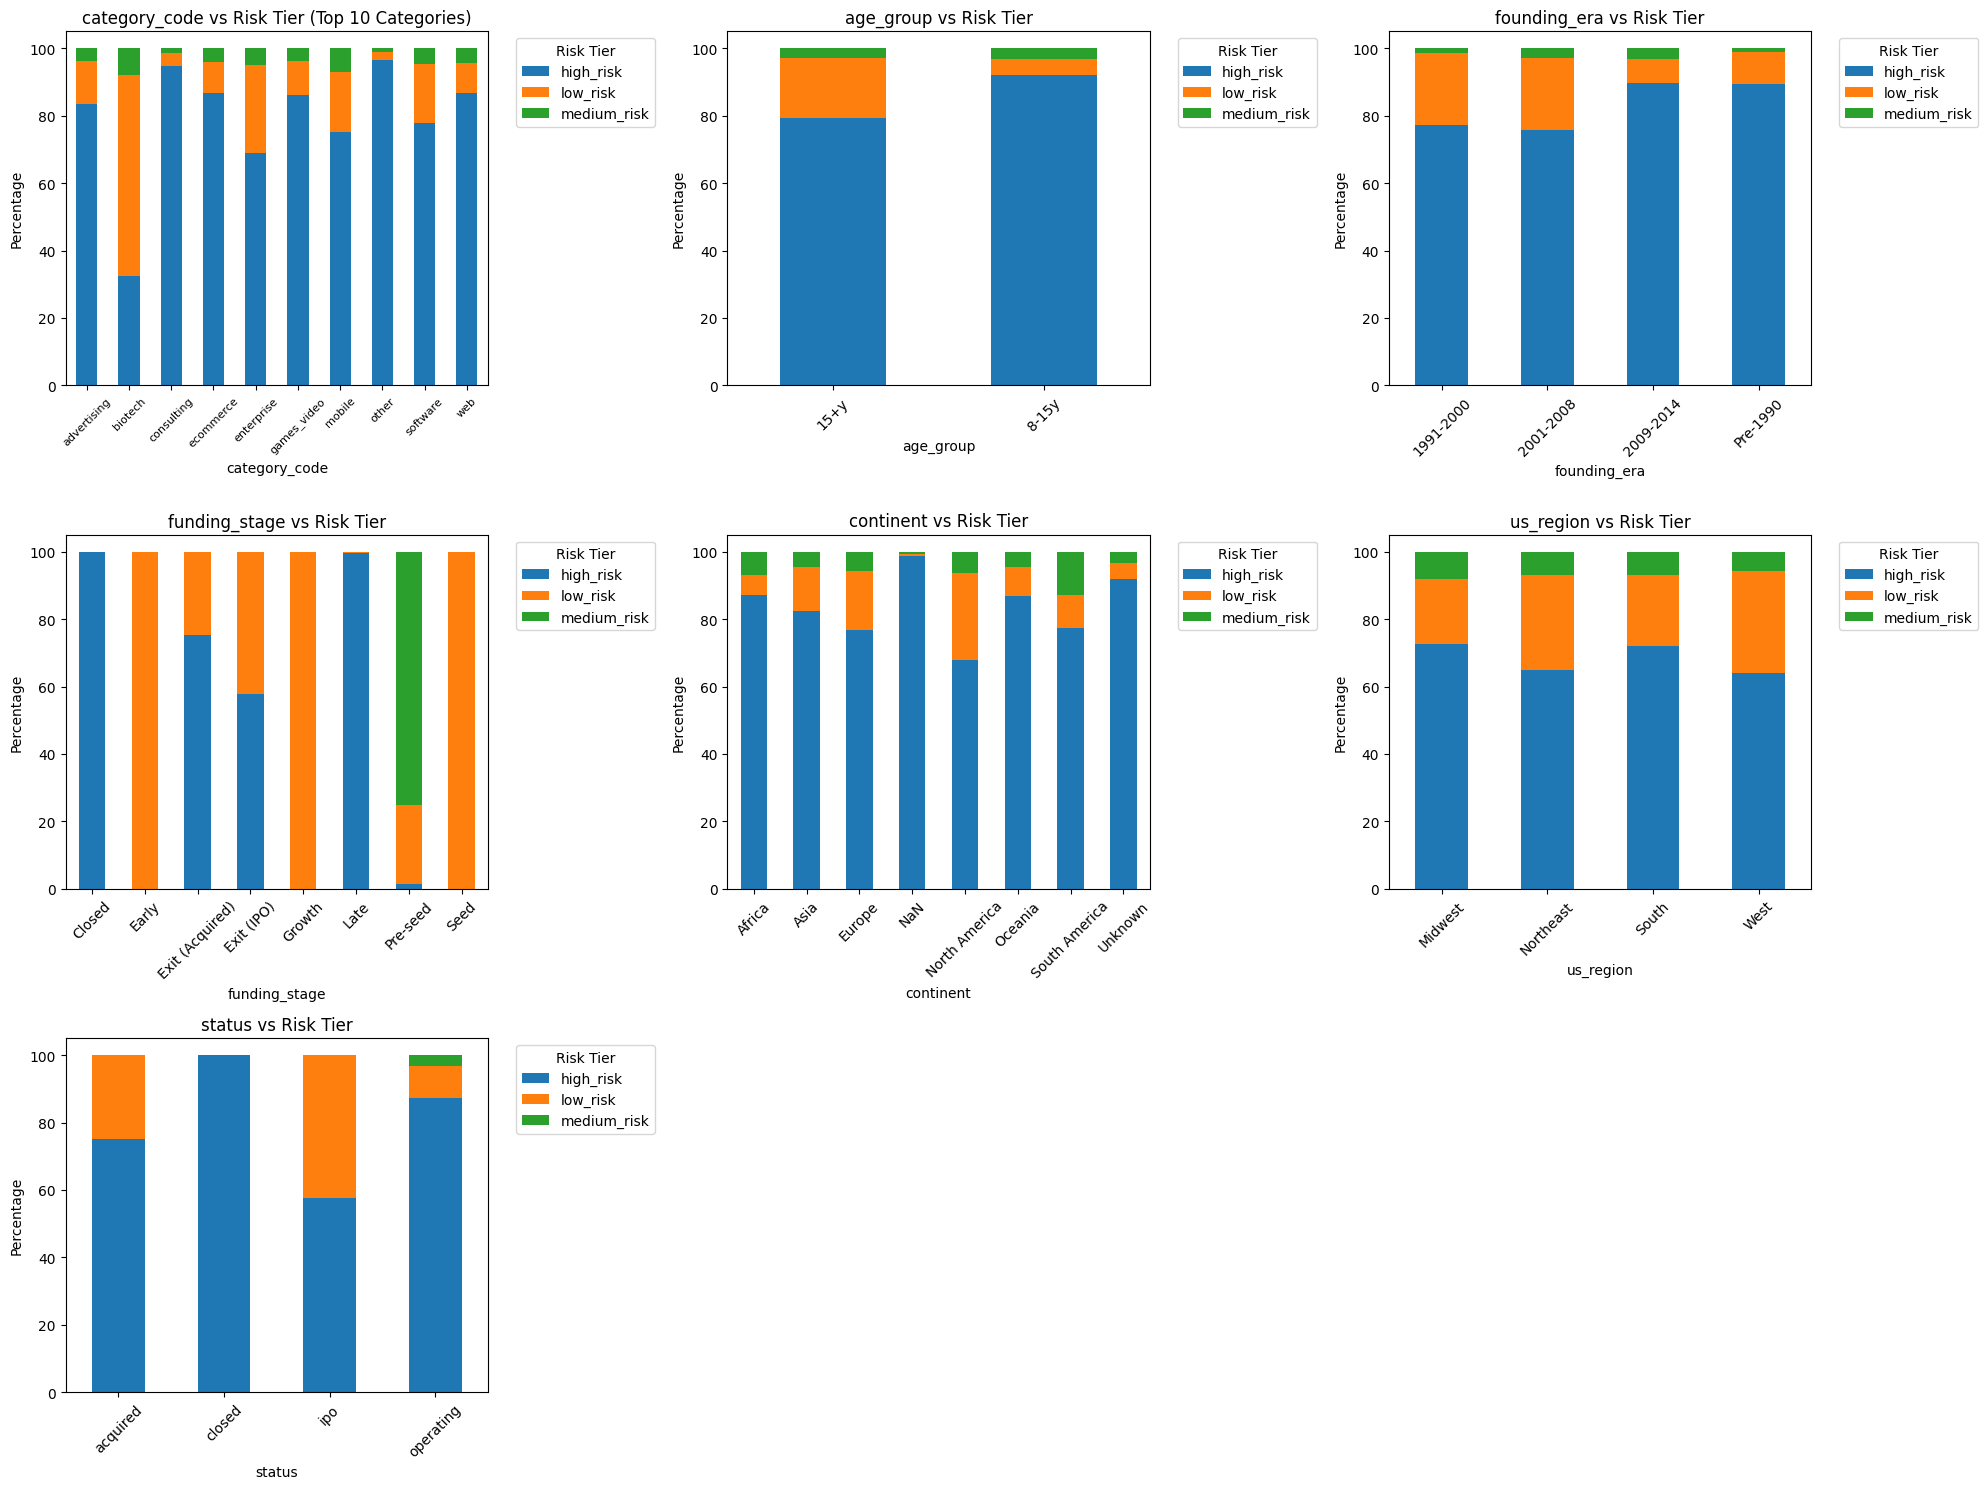

In [17]:
# Analyze categorical features by risk tier
categorical_features = ['category_code', 'age_group', 'founding_era', 'funding_stage', 
                       'continent', 'us_region', 'status']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        if feature == 'category_code':
            # Special handling for category_code - show only top 10 categories
            top_categories = df[feature].value_counts().head(10).index
            df_subset = df[df[feature].isin(top_categories)]
            ct = pd.crosstab(df_subset[feature], df_subset['risk_tier_label'], normalize='index') * 100
            
            ct.plot(kind='bar', ax=axes[i], stacked=True)
            axes[i].set_title(f'{feature} vs Risk Tier (Top 10 Categories)', fontsize=12)
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Percentage')
            axes[i].legend(title='Risk Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
            axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        else:
            # Normal handling for other categorical features
            ct = pd.crosstab(df[feature], df['risk_tier_label'], normalize='index') * 100
            
            ct.plot(kind='bar', ax=axes[i], stacked=True)
            axes[i].set_title(f'{feature} vs Risk Tier', fontsize=12)
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Percentage')
            axes[i].legend(title='Risk Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
            axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [18]:
print("\nCATEGORY_CODE (Top 10 only):")
top_categories = df['category_code'].value_counts().head(10).index
df_subset = df[df['category_code'].isin(top_categories)]
ct_category = pd.crosstab(df_subset['category_code'], df_subset['risk_tier_label'], normalize='index') * 100
print(ct_category.round(2))


CATEGORY_CODE (Top 10 only):
risk_tier_label  high_risk  low_risk  medium_risk
category_code                                    
advertising          83.47     12.82         3.71
biotech              32.53     59.44         8.04
consulting           94.83      3.76         1.42
ecommerce            86.57      9.42         4.00
enterprise           68.79     26.10         5.11
games_video          86.10     10.07         3.83
mobile               75.18     17.81         7.01
other                96.47      2.40         1.12
software             77.87     17.31         4.82
web                  86.68      8.82         4.50


In [19]:
# Age Group Analysis
print("\nAGE_GROUP:")
ct_age = pd.crosstab(df['age_group'], df['risk_tier_label'], normalize='index') * 100
print(ct_age.round(2))


AGE_GROUP:
risk_tier_label  high_risk  low_risk  medium_risk
age_group                                        
15+y                 79.29     17.67         3.04
8-15y                91.99      4.90         3.11


In [20]:
# Founding Era Analysis
print("\nFOUNDING_ERA:")
ct_founding = pd.crosstab(df['founding_era'], df['risk_tier_label'], normalize='index') * 100
print(ct_founding.round(2))


FOUNDING_ERA:
risk_tier_label  high_risk  low_risk  medium_risk
founding_era                                     
1991-2000            77.27     21.43         1.30
2001-2008            75.65     21.42         2.93
2009-2014            89.81      6.91         3.28
Pre-1990             89.29      9.59         1.12


In [21]:
# Funding Stage Analysis
print("\nFUNDING_STAGE:")
ct_funding = pd.crosstab(df['funding_stage'], df['risk_tier_label'], normalize='index') * 100
print(ct_funding.round(2))


FUNDING_STAGE:
risk_tier_label  high_risk  low_risk  medium_risk
funding_stage                                    
Closed              100.00      0.00         0.00
Early                 0.00    100.00         0.00
Exit (Acquired)      75.18     24.82         0.00
Exit (IPO)           57.76     42.24         0.00
Growth                0.00    100.00         0.00
Late                 99.70      0.30         0.00
Pre-seed              1.52     23.29        75.19
Seed                  0.00    100.00         0.00
